In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/08_stats_modeling/salary_experience_regression/Data/Salary_Data.csv')  # Make sure this file is in your working directory
print("First few rows:\n", df.head())


First few rows:
    YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [6]:

print("\nSummary Stats:")
print(df.describe())


Summary Stats:
       YearsExperience        Age         Salary
count        30.000000  30.000000      30.000000
mean          5.313333  27.216667   76003.000000
std           2.837888   5.161267   27414.429785
min           1.100000  21.000000   37731.000000
25%           3.200000  23.300000   56720.750000
50%           4.700000  25.000000   65237.000000
75%           7.700000  30.750000  100544.750000
max          10.500000  38.000000  122391.000000


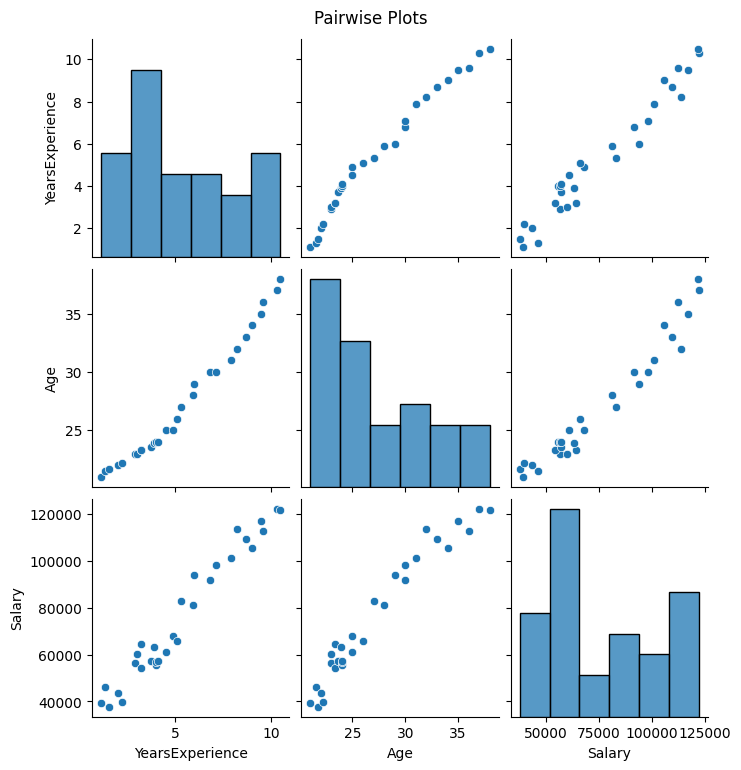

In [7]:
sns.pairplot(df)
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

### Simple Linear Regression

In [8]:
X_simple = sm.add_constant(df['YearsExperience'])
y = df['Salary']
model_simple = sm.OLS(y, X_simple).fit()

print("\n📘 Simple Linear Regression Summary:")
print(model_simple.summary())


📘 Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.14e-20
Time:                        18:00:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const

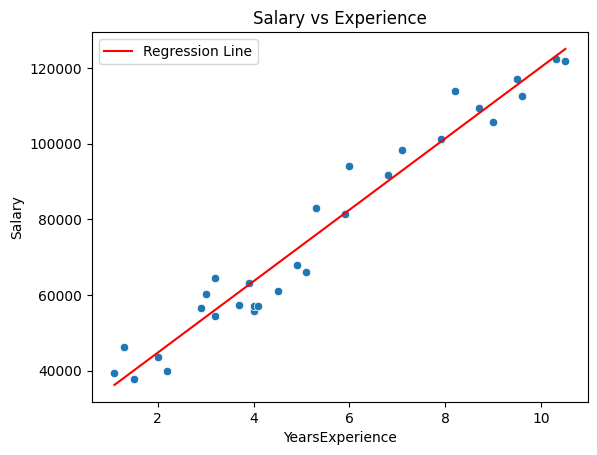

In [9]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.plot(df['YearsExperience'], model_simple.predict(X_simple), color='red', label='Regression Line')
plt.title('Salary vs Experience')
plt.legend()
plt.show()

### Multiple Linear Regression

In [10]:
X_multi = df[['YearsExperience', 'Age']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()

print("\n📘 Multiple Linear Regression Summary:")
print(model_multi.summary())



📘 Multiple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.35e-19
Time:                        18:01:54   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
con

In [11]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i)
                   for i in range(X_multi.shape[1])]
print("\n🔎 Variance Inflation Factors (VIF):\n", vif_data)


🔎 Variance Inflation Factors (VIF):
            Feature         VIF
0            const  483.802531
1  YearsExperience   39.490712
2              Age   39.490712


In [12]:
new_data = pd.DataFrame({
    'YearsExperience': [2, 5, 10],
    'Age': [25, 30, 35]
})
new_data = sm.add_constant(new_data)
predicted_salary = model_multi.predict(new_data)
print("\n💡 Predicted salaries:")
print(predicted_salary)


💡 Predicted salaries:
0     51545.059261
1     79185.187136
2    119132.021615
dtype: float64


In [13]:
residuals = model_multi.resid
fitted = model_multi.fittedvalues

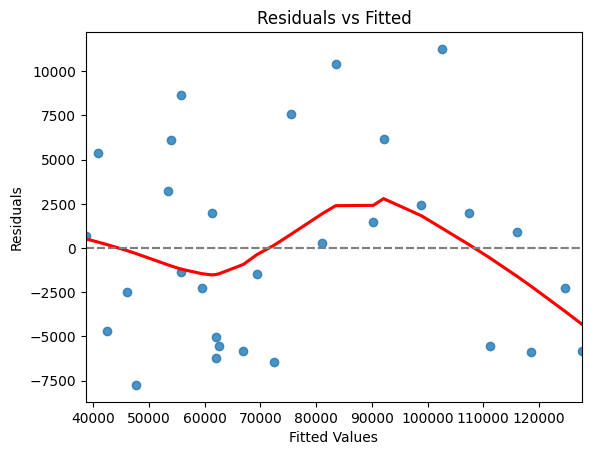

In [14]:
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

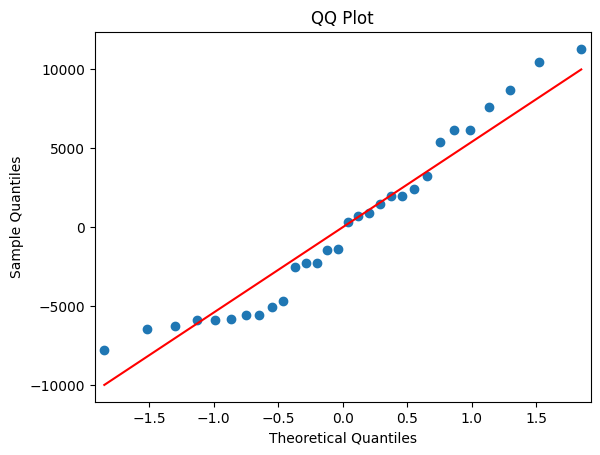

In [15]:
sm.qqplot(residuals, line='s')
plt.title("QQ Plot")
plt.show()

In [16]:
print("\n📌 KEY INSIGHTS:")
print("- Experience is positively correlated with salary.")
print("- Including age improves R² slightly, but check VIF for multicollinearity.")
print("- Residuals appear roughly normally distributed, indicating a decent fit.")



📌 KEY INSIGHTS:
- Experience is positively correlated with salary.
- Including age improves R² slightly, but check VIF for multicollinearity.
- Residuals appear roughly normally distributed, indicating a decent fit.


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions and errors
y_pred = model_multi.predict(X_multi)
residuals = y - y_pred

# Evaluation Metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"\n🔍 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE     : {mae:.2f}")
print(f"RMSE    : {rmse:.2f}")


🔍 Model Performance:
R² Score: 0.9600
MAE     : 4573.81
RMSE    : 5391.93


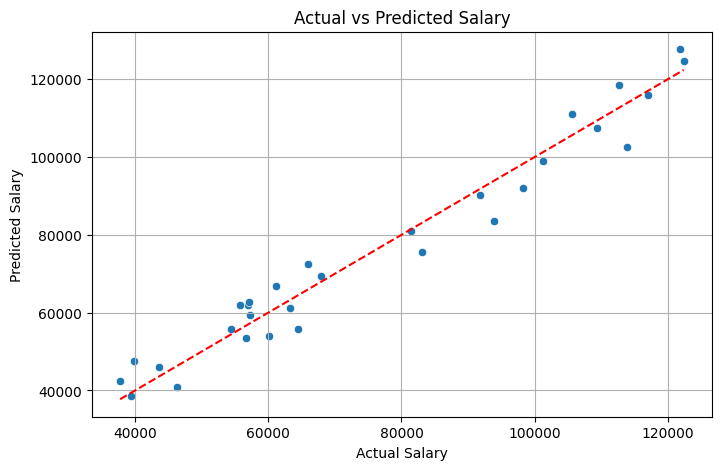

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

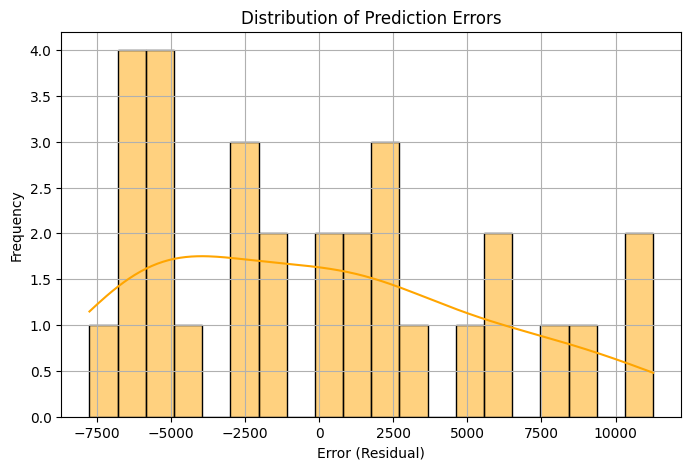

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/tmp/ipython-input-3652082225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette=colors)


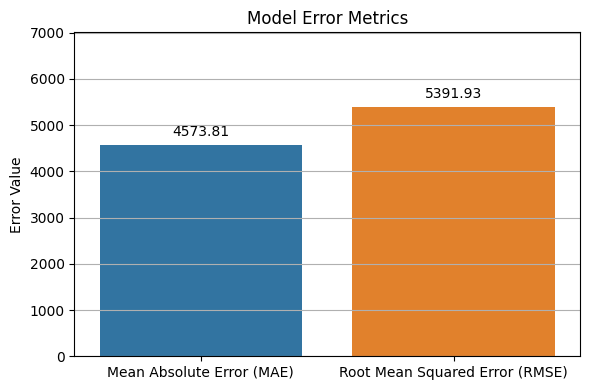

In [20]:
plt.figure(figsize=(6,4))
metrics = [mae, rmse]
labels = ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']
colors = ['#1f77b4', '#ff7f0e']

sns.barplot(x=labels, y=metrics, palette=colors)
plt.title("Model Error Metrics")
plt.ylabel("Error Value")
for i, val in enumerate(metrics):
    plt.text(i, val + 200, f"{val:.2f}", ha='center')
plt.ylim(0, max(metrics)*1.3)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()